<h1 style="text-align: center;">
    Numerical Methods : <br>
    Rate equations or MC approaches for modelling growth <br>
    - Benchmark -
</h1>
<p style="text-align: center;">
Léo BECHET, M2 CompuPhys 2024-2025
</p>

The following is a benchmark of the simulation used in task 2 and 3. 2 simulations are available, a single threaded one, and a multithreaded one. THough approach are different, usage does not change.

# System informations

In [58]:
import psutil

# Get the number of CPU cores
num_cores = psutil.cpu_count(logical=False)  # Physical cores
num_logical_cores = psutil.cpu_count(logical=True)  # Logical cores (including hyper-threading)

# Get CPU speed
cpu_freq = psutil.cpu_freq()

# Get memory information
memory_info = psutil.virtual_memory()

# Output the information
print(f"Physical CPU cores: {num_cores}")
print(f"Logical CPU cores: {num_logical_cores}")
print(f"CPU speed: {cpu_freq.current} MHz (current), {cpu_freq.min} MHz (min), {cpu_freq.max} MHz (max)")
print(f"Total RAM: {memory_info.total / (1024**3):.2f} GB")
# print(f"Available RAM: {memory_info.available / (1024**3):.2f} GB")
# print(f"Used RAM: {memory_info.used / (1024**3):.2f} GB")
# print(f"Memory Usage: {memory_info.percent}%")

Physical CPU cores: 12
Logical CPU cores: 16
CPU speed: 1904.9324375 MHz (current), 400.0 MHz (min), 3850.0 MHz (max)
Total RAM: 15.25 GB


# Single-threaded Benchmark

In [8]:
from task2and3 import Simulation as ST_sim# Single threaded


from matplotlib.colors import ListedColormap
import os
import time
import numpy as np
import matplotlib.pyplot as plt



points = 1000

sizes = [
    (10,10),
    (100,100),
    (300,300),
    (500,500),
    (1000,1000)
]



ST_step_time = []
ST_island_time = []
ST_monomer_time = []



Ndif_A = 10

# Single threaded benchmark
for size in sizes:
    print(f'Running Single-threaded with size {size}')
    sim = ST_sim(size, 0.5)

    step_time = []
    island_time = []
    monomer_time = []
    for i in range(points):
        if i%100 == 0:print(f'step {i}')

        if i%Ndif_A == 0: # deposition
            sim.Deposit("A")


        start_time_step = time.time()
        sim.Step() # step
        elapsed_time = (time.time() - start_time_step) * 1000  # in ms
        step_time.append(elapsed_time)


        start_time_step = time.time()
        isl, cells = sim.NumIslands() # islands
        elapsed_time = (time.time() - start_time_step) * 1000  # in ms
        island_time.append(elapsed_time)

        start_time_step = time.time()
        sim.NumMonomers() # num of monomers
        elapsed_time = (time.time() - start_time_step) * 1000  # in ms
        monomer_time.append(elapsed_time)
    
    ST_step_time.append(step_time)
    ST_island_time.append(island_time)
    ST_monomer_time.append(monomer_time)

Running Single-threaded with size (10, 10)
Sim v 0.2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (100, 100)
Sim v 0.2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (300, 300)
Sim v 0.2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (500, 500)
Sim v 0.2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (1000, 1000)
Sim v 0.2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900


In [10]:
print(ST_island_time)

[[0.05841255187988281, 0.04100799560546875, 0.03409385681152344, 0.02288818359375, 0.0286102294921875, 0.020503997802734375, 0.024318695068359375, 0.02002716064453125, 0.021219253540039062, 0.025272369384765625, 0.0247955322265625, 0.023603439331054688, 0.024318695068359375, 0.023365020751953125, 0.021457672119140625, 0.025510787963867188, 0.021457672119140625, 0.021219253540039062, 0.02193450927734375, 0.02288818359375, 0.021219253540039062, 0.026941299438476562, 0.029087066650390625, 0.029087066650390625, 0.029087066650390625, 0.29349327087402344, 0.025272369384765625, 0.024557113647460938, 0.022411346435546875, 0.019788742065429688, 0.025510787963867188, 0.029802322387695312, 0.030040740966796875, 0.024318695068359375, 0.02765655517578125, 0.024318695068359375, 0.024080276489257812, 0.02574920654296875, 0.02574920654296875, 0.030279159545898438, 0.02956390380859375, 0.025033950805664062, 0.024080276489257812, 0.024557113647460938, 0.02574920654296875, 0.029087066650390625, 0.0283718

# Single threaded Step time evolution

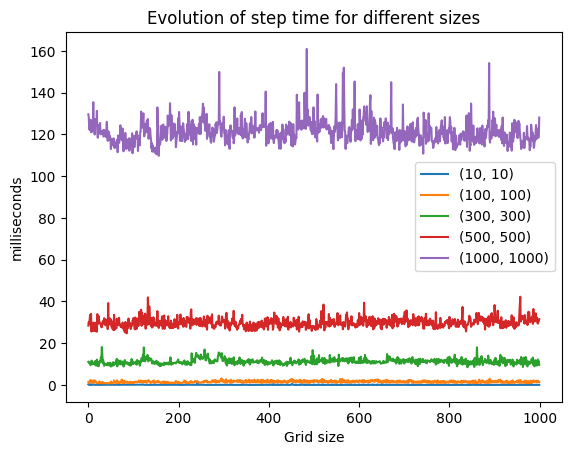

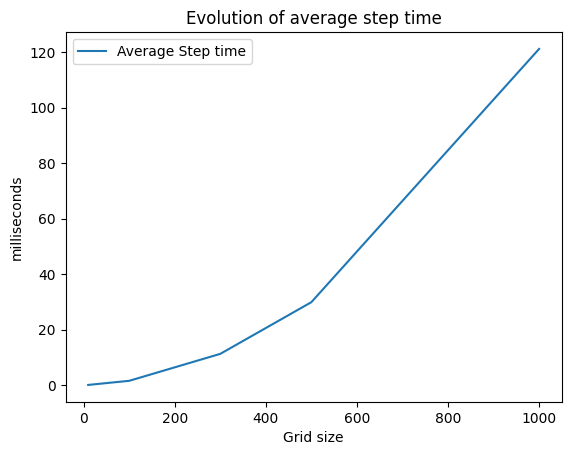

In [18]:
# Evolution of step time
for l in range(len(ST_step_time)):
    plt.plot(ST_step_time[l], label=f'{sizes[l]}')
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of step time for different sizes")
plt.legend()
plt.show()


plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_step_time], label="Average Step time")
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of average step time")
plt.legend()
plt.show()

# Single threaded Monomer time evolution

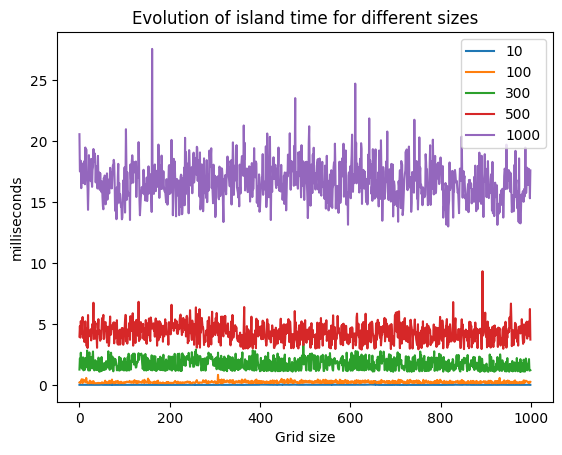

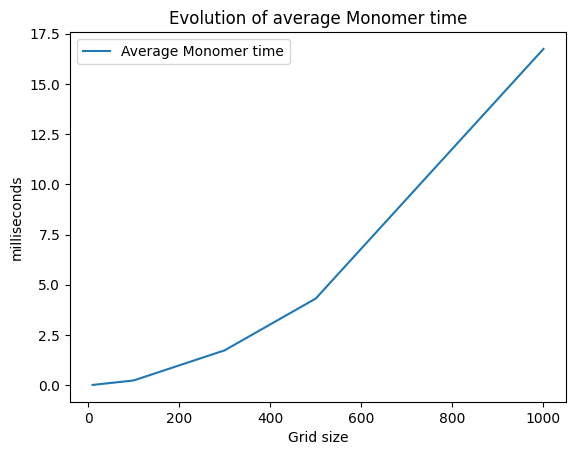

In [19]:
# Evolution of monomer time
for l in range(len(ST_monomer_time)):
    plt.plot(ST_monomer_time[l], label=f'{sizes[l][0]}')
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of island time for different sizes")
plt.legend()
plt.show()

plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_monomer_time], label="Average Monomer time")
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of average Monomer time")
plt.legend()
plt.show()

# Single threaded Island time evolution

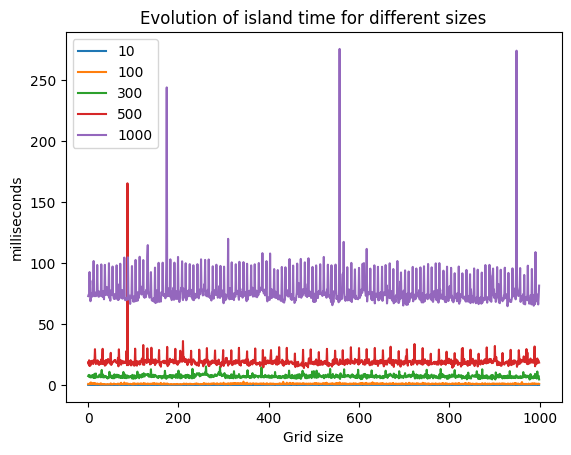

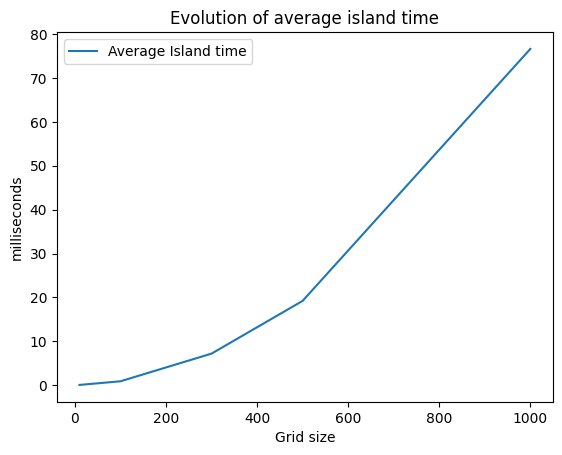

In [21]:
# Evolution of island time
for l in range(len(ST_island_time)):
    plt.plot(ST_island_time[l], label=f'{sizes[l][0]}')
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of island time for different sizes")
plt.legend()
plt.show()


plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_island_time], label="Average Island time")
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of average island time")
plt.legend()
plt.show()

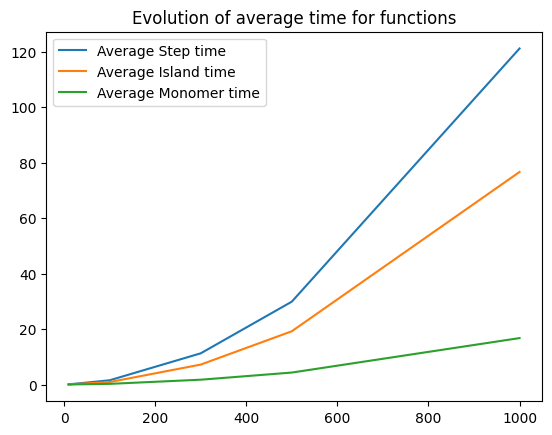

In [22]:
plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_step_time], label="Average Step time")
plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_island_time], label="Average Island time")
plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_monomer_time], label="Average Monomer time")
plt.title("Evolution of average time for functions")
plt.legend()
plt.show()

# Multi-threaded Benchmark

In [33]:
from task2_parallel import Simulation as MT_sim# Single threaded


from matplotlib.colors import ListedColormap
import os
import time
import numpy as np
import matplotlib.pyplot as plt



MT_step_time = []
MT_island_time = []
MT_monomer_time = []

# Single threaded benchmark
for size in sizes:
    print(f'Running Single-threaded with size {size}')
    sim = MT_sim(size, 0.5)
    
    # necessary to compile numba and not offset the benchmark
    sim.Step()

    step_time = []
    island_time = []
    monomer_time = []
    for i in range(points):
        if i%100 == 0:print(f'step {i}')

        if i%Ndif_A == 0: # deposition
            sim.Deposit("A")


        start_time_step = time.time()
        sim.Step() # step
        elapsed_time = (time.time() - start_time_step) * 1000  # in ms
        step_time.append(elapsed_time)


        start_time_step = time.time()
        isl, cells = sim.NumIslands() # islands
        elapsed_time = (time.time() - start_time_step) * 1000  # in ms
        island_time.append(elapsed_time)

        start_time_step = time.time()
        sim.NumMonomers() # num of monomers
        elapsed_time = (time.time() - start_time_step) * 1000  # in ms
        monomer_time.append(elapsed_time)
    
    MT_step_time.append(step_time)
    MT_island_time.append(island_time)
    MT_monomer_time.append(monomer_time)

Running Single-threaded with size (10, 10)
Sim v 0.2 (Numba Parallelized)
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (100, 100)
Sim v 0.2 (Numba Parallelized)
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (300, 300)
Sim v 0.2 (Numba Parallelized)
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (500, 500)
Sim v 0.2 (Numba Parallelized)
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
Running Single-threaded with size (1000, 1000)
Sim v 0.2 (Numba Parallelized)
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900


# Multi threaded Step time evolution

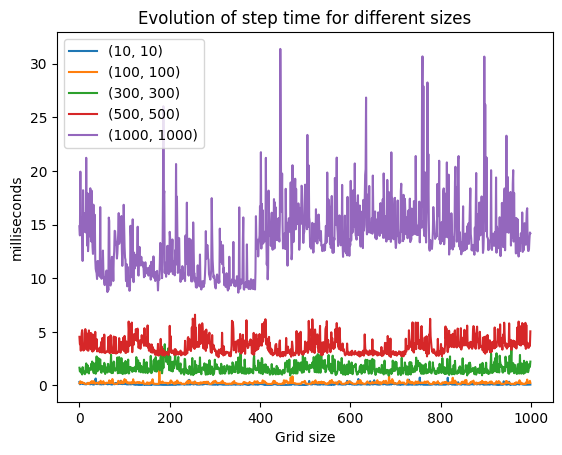

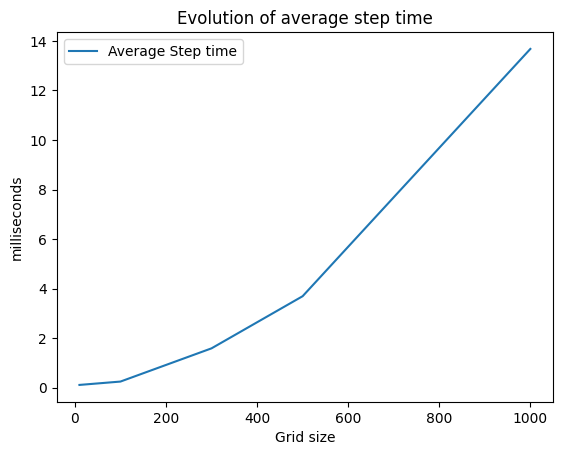

In [34]:
# Evolution of step time
for l in range(len(MT_step_time)):
    plt.plot(MT_step_time[l], label=f'{sizes[l]}')
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of step time for different sizes")
plt.legend()
plt.show()


plt.plot([i[0] for i in sizes], [sum(i)/points for i in MT_step_time], label="Average Step time")
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of average step time")
plt.legend()
plt.show()

# Multi threaded Monomer time evolution

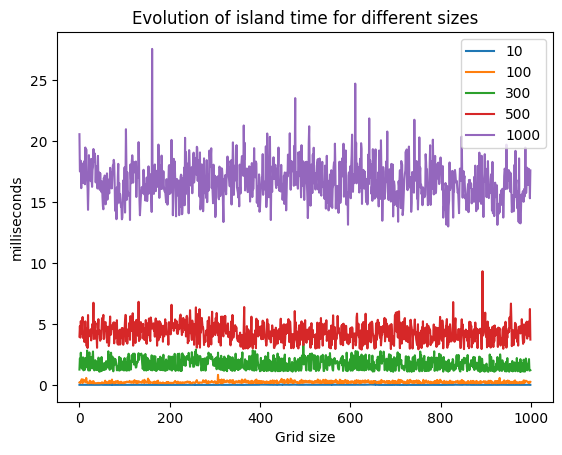

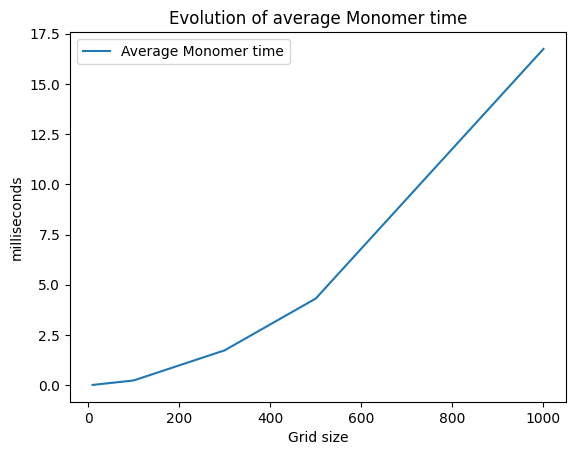

In [35]:
# Evolution of monomer time
for l in range(len(ST_monomer_time)):
    plt.plot(ST_monomer_time[l], label=f'{sizes[l][0]}')
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of island time for different sizes")
plt.legend()
plt.show()

plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_monomer_time], label="Average Monomer time")
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of average Monomer time")
plt.legend()
plt.show()

# Multi threaded Island time evolution

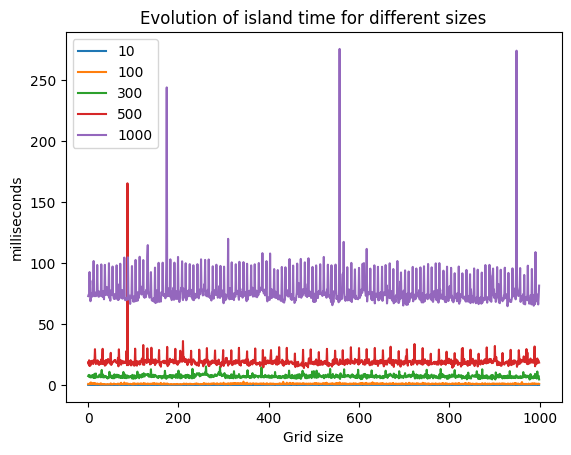

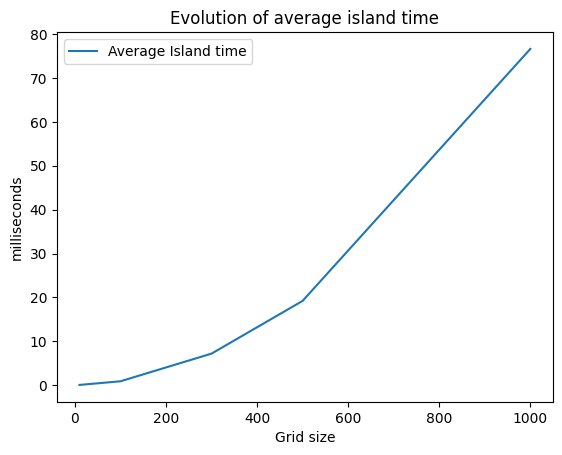

In [36]:
# Evolution of island time
for l in range(len(ST_island_time)):
    plt.plot(ST_island_time[l], label=f'{sizes[l][0]}')
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of island time for different sizes")
plt.legend()
plt.show()


plt.plot([i[0] for i in sizes], [sum(i)/points for i in ST_island_time], label="Average Island time")
plt.xlabel("Grid size")
plt.ylabel("milliseconds")
plt.title("Evolution of average island time")
plt.legend()
plt.show()

# General comparison

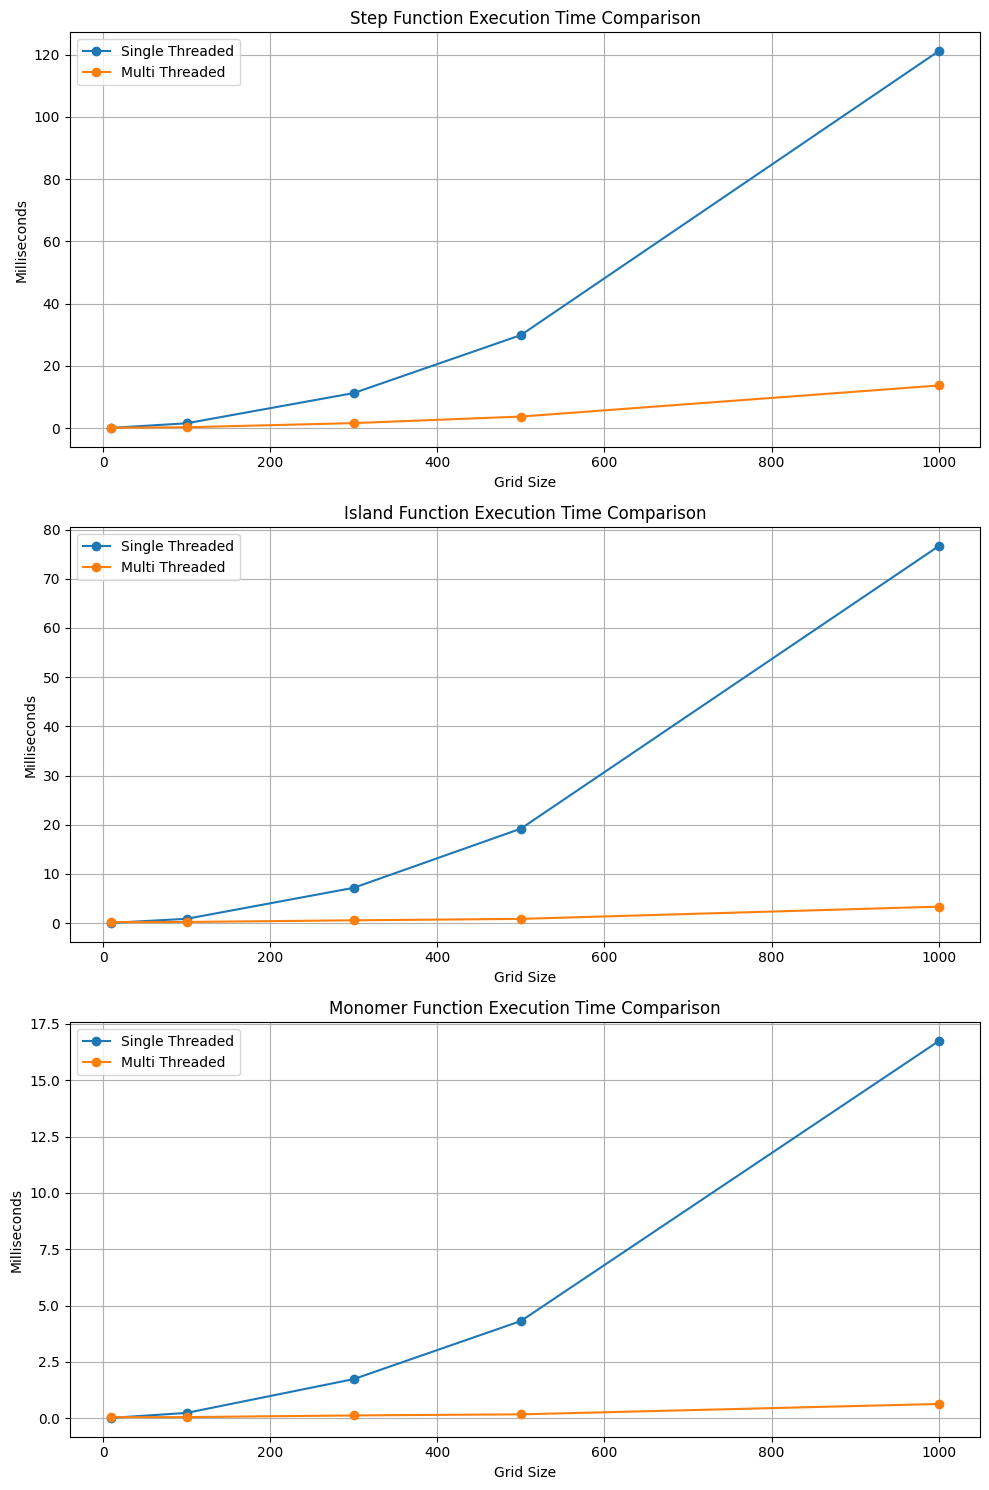

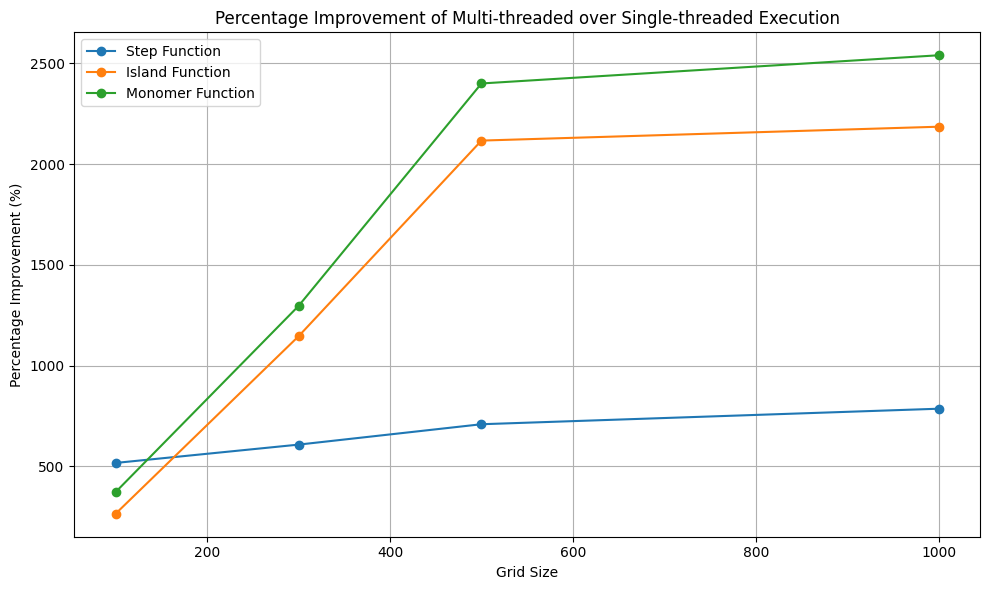

step improvement 	[-53.70023977 516.43531824 607.40530172 708.64762247 785.73043831]
island improvement 	[ -75.60056046  263.91064001 1145.27580284 2117.12783114 2186.05846418]
monomer improvement 	[ -67.64026108  371.52559462 1295.79648052 2400.75942369 2540.82799833]


In [65]:
# Create a figure and axes for the plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Step function comparison
axs[0].plot([i[0] for i in sizes], [sum(i)/points for i in ST_step_time], label='Single Threaded', marker='o')
axs[0].plot([i[0] for i in sizes], [sum(i)/points for i in MT_step_time], label='Multi Threaded', marker='o')
axs[0].set_title('Step Function Execution Time Comparison')
axs[0].set_xlabel('Grid Size')
axs[0].set_ylabel('Milliseconds')
axs[0].legend()
axs[0].grid()

# Plot for Island function comparison
axs[1].plot([i[0] for i in sizes], [sum(i)/points for i in ST_island_time], label='Single Threaded', marker='o')
axs[1].plot([i[0] for i in sizes], [sum(i)/points for i in MT_island_time], label='Multi Threaded', marker='o')
axs[1].set_title('Island Function Execution Time Comparison')
axs[1].set_xlabel('Grid Size')
axs[1].set_ylabel('Milliseconds')
axs[1].legend()
axs[1].grid()

# Plot for Monomer function comparison
axs[2].plot([i[0] for i in sizes], [sum(i)/points for i in ST_monomer_time], label='Single Threaded', marker='o')
axs[2].plot([i[0] for i in sizes], [sum(i)/points for i in MT_monomer_time], label='Multi Threaded', marker='o')
axs[2].set_title('Monomer Function Execution Time Comparison')
axs[2].set_xlabel('Grid Size')
axs[2].set_ylabel('Milliseconds')
axs[2].legend()
axs[2].grid()

# Show the plots
plt.tight_layout()
plt.show()

# Calculate the percentage improvement and plot
avg_MT_step_time = np.array([sum(i) / points for i in MT_step_time])
avg_ST_step_time = np.array([sum(i) / points for i in ST_step_time])
avg_MT_island_time = np.array([sum(i) / points for i in MT_island_time])
avg_ST_island_time = np.array([sum(i) / points for i in ST_island_time])
avg_MT_monomer_time = np.array([sum(i) / points for i in MT_monomer_time])
avg_ST_monomer_time = np.array([sum(i) / points for i in ST_monomer_time])

# Calculate the percentage improvement
percentage_improvement_step = ((avg_ST_step_time / avg_MT_step_time) - 1) * 100
percentage_improvement_island = ((avg_ST_island_time / avg_MT_island_time) - 1) * 100
percentage_improvement_monomer = ((avg_ST_monomer_time / avg_MT_monomer_time) - 1) * 100



# Final graph for percentage improvement
plt.figure(figsize=(10, 6))
plt.plot([i[0] for i in sizes][1:], percentage_improvement_step[1:], label='Step Function', marker='o')
plt.plot([i[0] for i in sizes][1:], percentage_improvement_island[1:], label='Island Function', marker='o')
plt.plot([i[0] for i in sizes][1:], percentage_improvement_monomer[1:], label='Monomer Function', marker='o')
plt.title('Percentage Improvement of Multi-threaded over Single-threaded Execution')
plt.xlabel('Grid Size')
plt.ylabel('Percentage Improvement (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


print(f'step improvement \t{percentage_improvement_step}')
print(f'island improvement \t{percentage_improvement_island}')
print(f'monomer improvement \t{percentage_improvement_monomer}')


The performance comparison between single-threaded (ST) and multi-threaded (MT) implementations reveals an interesting trend across different functions—**step**, **island counting**, and **monomer counting**. For smaller grid sizes, multi-threading consistently underperforms compared to single-threading. This is evident from the negative improvement percentages, such as **-53.7%** for the step function, **-75.6%** for the island counting function, and **-67.6%** for the monomer counting function on a small 10x10 grid. The initial underperformance is likely due to the overhead associated with managing threads, which can outweigh the benefits of parallelization when dealing with a small number of cells.

However, as the grid size increases, the MT implementation begins to significantly outperform ST. For instance, the step function shows a **516%** improvement on a 100x100 grid and continues to rise to **785%** on a 1000x1000 grid. Similarly, the island counting function improves by **263%** at 100x100 and jumps to an impressive **2186%** at 1000x1000. The monomer counting function follows a similar pattern, with a **371%** improvement at 100x100 and a substantial **2540%** improvement at 1000x1000. This large increase in performance is due to the parallel nature of these processes, where multi-threading allows different sections of the grid to be processed simultaneously, dramatically reducing computation time as the grid size grows.

In summary, while multi-threading introduces overhead that makes it inefficient for small grids, it proves to be vastly superior for larger simulations. The parallel execution in the MT version significantly accelerates all three functions—step, island counting, and monomer counting—especially as grid sizes increase, allowing the MT implementation to outperform ST by a substantial margin.